In [1]:

import numpy as np
import matplotlib.pyplot as plt

import funciones as fn
from funciones import *

C:\Users\franc\AppData\Local\Temp\ipykernel_16968\2616934421.py:6: RuntimeWarning: divide by zero encountered in divide
  wavelengths = 2 * np.pi / omega * 1000


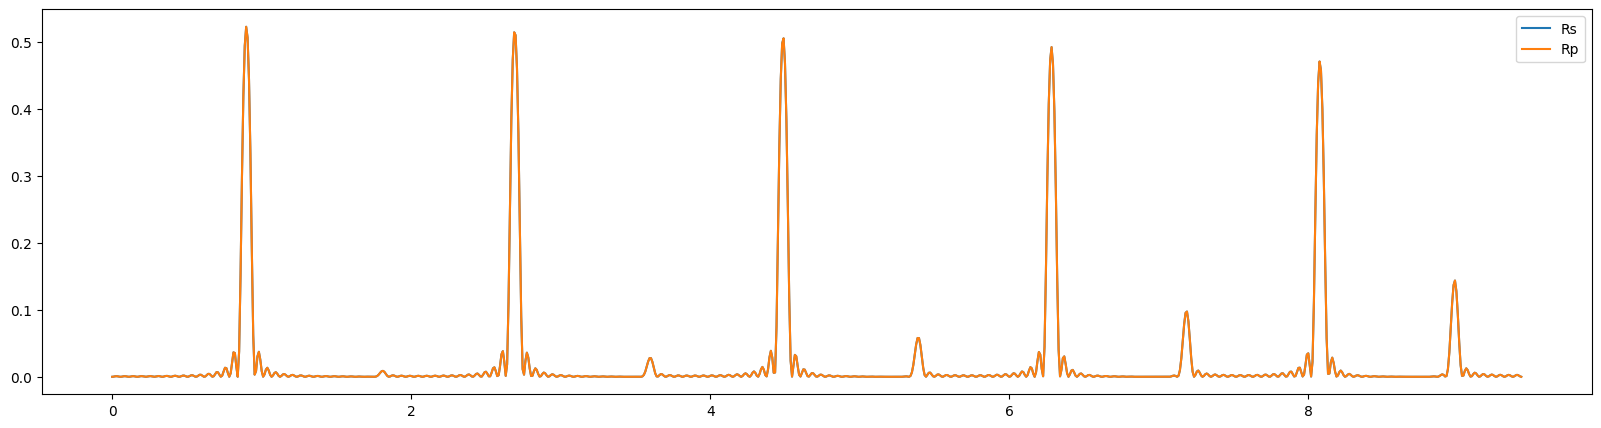

In [2]:
n = [3.4] + [3.6] + [3.4, 3.6] * 15 + [3.4]
d = [0] + [500] + [500, 500] * 15 + [0]

omega = np.linspace(0, 3 * np.pi, 1000)

wavelengths = 2 * np.pi / omega * 1000

Rss = []
Rpp = []
Tss = []
Tpp = []
for wavel in wavelengths:
    Rs, Rp, Ts, Tp = multicapa(n, d, wavel, theta0=np.pi / 180 * 0)
    Rss.append(Rs)
    Rpp.append(Rp)
    Tss.append(Ts)
    Tpp.append(Tp)

plt.figure(figsize=(20, 5))
plt.plot(omega, Rss, label='Rs')
plt.plot(omega, Rpp, label='Rp')

plt.legend()
plt.show()

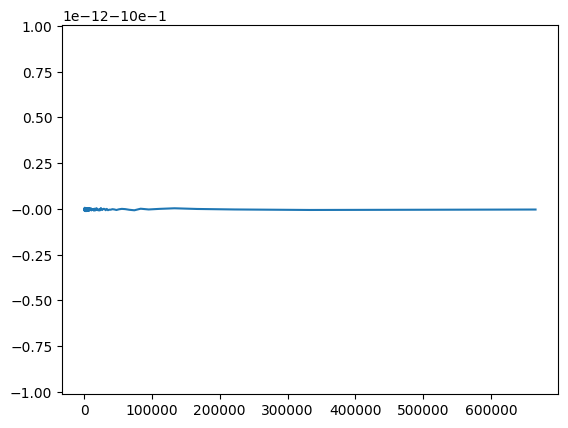

In [3]:
noice = np.ones(len(Rss)) - Rss - Rpp - Tss - Tpp

plt.plot(wavelengths, noice)
plt.show()

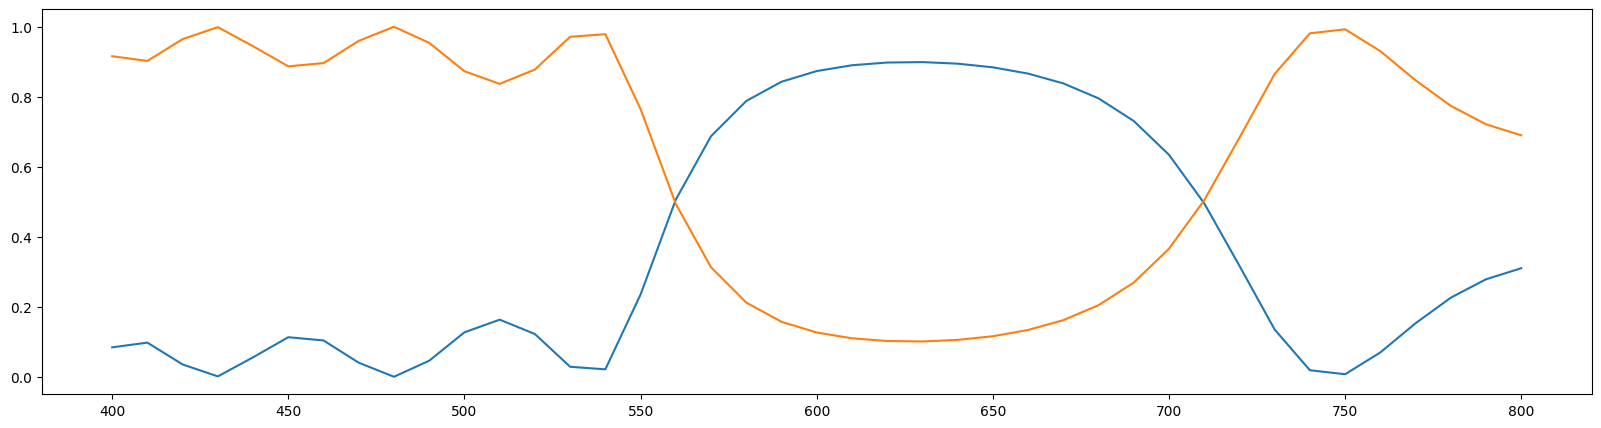

In [52]:
theta = 15  # degrees
capas = 5

dcapal = 90
dcapah = 110

n = [1] + [1.75, 1.35] * capas + [1.75] + [1]
d = [0] + [dcapah, dcapal] * capas + [dcapah] + [0]

wavelengths = np.linspace(400, 800, 41)
Rss = []
Rpp = []
Tss = []
Tpp = []

for wavel in wavelengths:
    Rs, Rp, Ts, Tp = multicapa(n, d, wavel, theta0=np.pi / 180 * theta)

    Rss.append(Rs)
    Rpp.append(Rp)
    Tss.append(Ts)
    Tpp.append(Tp)

plt.figure(figsize=(20, 5))
plt.plot(wavelengths, Rss, label='Rs')
plt.plot(wavelengths, Tss, label='Ts')
plt.show()

In [53]:
import pandas as pd

df = pd.DataFrame({'wavelength': wavelengths, 'Rs': Rss,
                  'Rp': Rpp, 'Ts': Tss, 'Tp': Tpp})

df.to_csv('data.csv', index=False)

In [54]:
data = pd.read_csv('data.csv')

data.head()

,wavelength,Rs,Rp,Ts,Tp
0,400.0,0.084141,0.069078,0.915859,0.930922
1,410.0,0.097622,0.080352,0.902378,0.919648
2,420.0,0.035191,0.028551,0.964809,0.971449
3,430.0,0.001111,0.000935,0.998889,0.999065
4,440.0,0.055688,0.045933,0.944312,0.954067


In [55]:

def fom(file, n, d, theta):
    data = pd.read_csv(file)
    R = data['Rs']
    Rpred = []
    
    for wavel in data['wavelength']:
        Rcal, _, _, _ = multicapa([1]+n+[1], [0]+d+[0], wavel, theta0=np.pi / 180 * theta)
        Rpred.append(Rcal)

    return np.sum((R-Rpred)**2) / len(R)


energia = fom("data.csv", n, d, 15)

print(energia)

1.4168334561240345e-31


In [9]:
import pygad

In [73]:
function_inputs = [[1], [1]] * 10
print(function_inputs)
desired_output = 0


def fitness(ga_instance, solution, solution_idx):
    n = solution[:10]
    d = solution[10:]
    return -1*fom("data.csv", n, d, 15)


fitness_function = fitness

num_generations = 5
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)
print(num_genes)
init_range_low = [1,1] * 10
init_range_high = [2]*10 + [200]*10


parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10


ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
20


c:\Users\franc\miniconda3\envs\notebooks\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [74]:
# hacer esto en cuda

ga_instance.run();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


solucion [  0.62468023   1.79353932   1.71563623   1.12975484   1.64039792
   2.40411813   1.81519338   1.55013729  -0.33318338   1.4296746
 189.11456134 162.93599244  49.81285375 142.61797292  97.71325559
  25.52917407  38.66820071 127.24434867 111.61945572  11.25539901], fitness -0.10924065226253825 indice 0


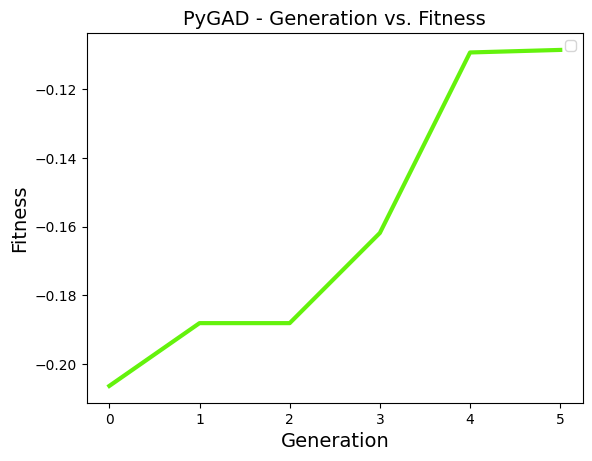

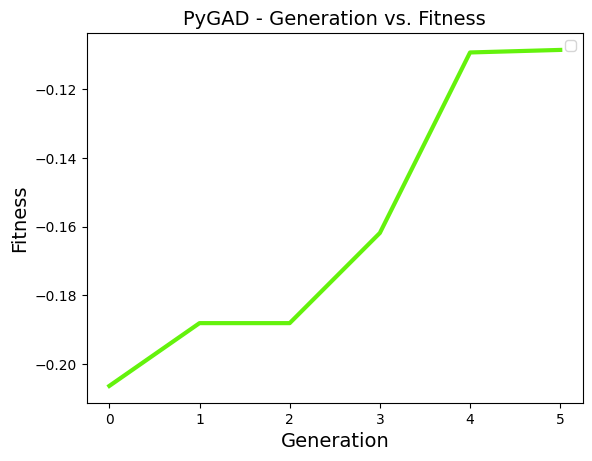

In [75]:
a, b, c = ga_instance.best_solution();
print(f"solucion {a}, fitness {b} indice {c}")

ga_instance.plot_fitness()